# Naive Bayes

### Text

In [113]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os
import shutil

#OUTPUT FOLDER: START FRESH (DELETE OLD ONE IF EXISTS)
output_dir = output_dir = "../websitedata/naiveText"
if os.path.exists(output_dir) and os.path.isdir(output_dir):
    shutil.rmtree(output_dir)
os.mkdir(output_dir)

teledf = pd.read_csv("../websitedata/television.csv")

teledf["sentiment"] = teledf["compound"].apply(lambda x: "Pos" if x > 0.5 else "Neg" if x < 0.0 else np.nan)
teledf = teledf.dropna()
#print(teledf.isna().sum())
print(teledf)

     Unnamed: 0          Word  neg  neu  pos  compound sentiment
38           41        death,  1.0  0.0  0.0   -0.5994       Neg
47           50   disruptions  1.0  0.0  0.0   -0.3400       Neg
121         128        forced  1.0  0.0  0.0   -0.4588       Neg
133         141        battle  1.0  0.0  0.0   -0.3818       Neg
136         144      victims,  1.0  0.0  0.0   -0.3182       Neg
137         145       destroy  1.0  0.0  0.0   -0.5423       Neg
141         149    terrifying  1.0  0.0  0.0   -0.5719       Neg
156          13        severe  1.0  0.0  0.0   -0.3818       Neg
185          43         dead.  1.0  0.0  0.0   -0.6486       Neg
194          52         loved  0.0  0.0  1.0    0.5994       Pos
213           4         fake.  1.0  0.0  0.0   -0.4767       Neg
243           7     notorious  1.0  0.0  0.0   -0.4404       Neg
245           9       killers  1.0  0.0  0.0   -0.6486       Neg
248          12       murders  1.0  0.0  0.0   -0.6124       Neg
269          33        de

In [114]:
# use count vectorizer to retrieve one-hot encodings

from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(min_df = 2)

corpus = teledf["Word"].to_list()

y = teledf["sentiment"]

Xs = count_vectorizer.fit_transform(corpus)   
x = np.array(Xs.todense())

maxs = np.max(x, axis = 0)
x = np.ceil(x / maxs)

print(x.shape)


(18, 1)


In [118]:
import random
N=x.shape[0]
l = [*range(N)]     # indices
cut = int(0.8 * N) #80% of the list
random.shuffle(l)   # randomize
train_index = l[:cut] # first 80% of shuffled list
test_index = l[cut:] # last 20% of shuffled list

print(train_index[0:10])
print(test_index[0:10])
print(N)

[2, 15, 16, 8, 13, 10, 6, 4, 17, 12]
[7, 5, 1, 14]


AttributeError: 'list' object has no attribute 'isna'

### FEATURE SELECTION WITH TEXT DATA

In [116]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import time

def train_MNB_model(x, y, train_index, test_index, i_print=False):
    if i_print:
        print(x.shape, y.shape)

    # Split the data using indices
    x_train = x[train_index]
    y_train = y[train_index].flatten()

    x_test = x[test_index]
    y_test = y[test_index].flatten()

    # Initialize model
    model = GaussianNB()

    # Train model
    start = time.process_time()
    model.fit(x_train, y_train)
    time_train = time.process_time() - start

    # Label predictions for training and test set
    start = time.process_time()
    yp_train = model.predict(x_train)
    yp_test = model.predict(x_test)
    time_eval = time.process_time() - start

    acc_train = accuracy_score(y_train, yp_train) * 100
    acc_test = accuracy_score(y_test, yp_test) * 100

    if i_print:
        print(acc_train, acc_test, time_train, time_eval)

    return acc_train, acc_test, time_train, time_eval


# Test
(acc_train, acc_test, time_train, time_eval) = train_MNB_model(x, y, train_index, test_index, i_print=True)


(18, 1) (18,)


KeyError: "None of [Index([8, 5, 4, 12, 0, 7, 3, 17, 10, 11, 16, 9, 2, 6], dtype='int32')] are in the [index]"

In [106]:
# FEATURE SELECTION

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import time

def train_MNB_model(X,Y,i_print=False):

    if(i_print):
        print(X.shape,Y.shape)

    #SPLIT
    x_train=X[train_index]
    y_train=Y[train_index].flatten()

    x_test=X[test_index]
    y_test=Y[test_index].flatten()

    # INITIALIZE MODEL 
    model = GaussianNB()

    # TRAIN MODEL 
    start = time.process_time()
    model.fit(x_train,y_train)
    time_train=time.process_time() - start

    # LABEL PREDICTIONS FOR TRAINING AND TEST SET 
    start = time.process_time()
    yp_train = model.predict(x_train)
    yp_test = model.predict(x_test)
    time_eval=time.process_time() - start

    acc_train= accuracy_score(y_train, yp_train)*100
    acc_test= accuracy_score(y_test, yp_test)*100

    if(i_print):
        print(acc_train,acc_test,time_train,time_eval)

    return (acc_train,acc_test,time_train,time_eval)


#TEST
print(type(x),type(y))
print(x.shape,y.shape)
(acc_train,acc_test,time_train,time_eval)=train_MNB_model(x,y,i_print=True)

<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>
(18, 1) (18,)
(18, 1) (18,)


KeyError: "None of [Index([10, 14, 15, 9, 8, 17, 2, 5, 13, 7, 0, 1, 3, 11], dtype='int32')] are in the [index]"

In [ ]:
sentiment_choice = ["Pos", "Neg"]
#props = (y_train.value_counts() / len(y_train)).to_list()
props = (y_train.value_counts() / len(y_train)).to_dict()
print("Training Data Class (Im)balance Values\n", y_train.value_counts(), sep = "")
print("\nTraining Data Class (Im)balance Proportions\n", props, sep = "")

#dominant_class = sentiment_choice[np.argmax(max(props))]
dominant_class = max(props, key=props.get)

print("\nThe dominant class is:", dominant_class)

In [ ]:
# Matt MNB here

In [ ]:
# split dataset into training and testing sets (80-20 split)

from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

### Record

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os
import shutil
import requests
import json
import re
#import pycountry
from sklearn.feature_extraction.text import CountVectorizer

#OUTPUT FOLDER: START FRESH (DELETE OLD ONE IF EXISTS)
output_dir = output_dir = "../websitedata/naiveOutput"
if os.path.exists(output_dir) and os.path.isdir(output_dir):
    shutil.rmtree(output_dir)
os.mkdir(output_dir)

happygdp = pd.read_csv("../websitedata/happy_py.csv")

happygdp["GDP"] = happygdp["GDP"].str.replace(',', '').astype(float)

happygdp = happygdp.rename(columns={"Unnamed: 0": "Country"})

# Score Categories: 0-4.0 = "Low"; 4.1 - 7.0 = "Moderate"; 7.1 & above = "High" 
happygdp["Happiness"] = pd.cut(happygdp["Score"], bins=[0, 4.0, 7.0, 10], 
                     labels=["Low", "Moderate", "High"])

Happydf = happygdp.drop(["Score", "Happiness", "Entity", "Code"], axis=1)

print(Happydf)

     Country      GDP
0          1    363.7
1        597   6802.8
2        857   4273.9
3       2133  13686.0
4       2393   7014.2
..       ...      ...
132    56105   2255.2
133    56816  15975.7
134    57076   4163.5
135    58181   1487.9
136    58442   1267.0

[137 rows x 2 columns]


In [ ]:
x = Happydf.to_numpy()

y = happygdp["Happiness"]
y=np.array(y)

print(x.shape, y.shape)

(137, 2) (137,)


In [ ]:
import random
N=x.shape[0]
l = [*range(N)]     # indices
cut = int(0.8 * N) #80% of the list
random.shuffle(l)   # randomize
train_index = l[:cut] # first 80% of shuffled list
test_index = l[cut:] # last 20% of shuffled list

print(train_index[0:10])
print(test_index[0:10])

[49, 27, 86, 30, 77, 2, 135, 0, 130, 82]
[84, 25, 92, 107, 22, 58, 100, 17, 71, 127]


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import time

def train_MNB_model(X,Y,i_print=False):

    if(i_print):
        print(X.shape,Y.shape)

    #SPLIT
    x_train=X[train_index]
    y_train=Y[train_index].flatten()

    x_test=X[test_index]
    y_test=Y[test_index].flatten()

    # INITIALIZE MODEL 
    model = MultinomialNB()

    # TRAIN MODEL 
    start = time.process_time()
    model.fit(x_train,y_train)
    time_train=time.process_time() - start

    # LABEL PREDICTIONS FOR TRAINING AND TEST SET 
    start = time.process_time()
    yp_train = model.predict(x_train)
    yp_test = model.predict(x_test)
    time_eval=time.process_time() - start

    acc_train= accuracy_score(y_train, yp_train)*100
    acc_test= accuracy_score(y_test, yp_test)*100

    if(i_print):
        print(acc_train,acc_test,time_train,time_eval)

    return (acc_train,acc_test,time_train,time_eval)


#TEST
print(type(x),type(y))
print(x.shape,y.shape)
(acc_train,acc_test,time_train,time_eval)=train_MNB_model(x,y,i_print=True)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(137, 2) (137,)
(137, 2) (137,)
48.62385321100918 46.42857142857143 0.03125 0.0


In [ ]:
# FEATURE SELECTION FOR RECORD DATA

from sklearn.feature_selection import VarianceThreshold

##UTILITY FUNCTION TO INITIALIZE RELEVANT ARRAYS
def initialize_arrays():
    global num_features,train_accuracies
    global test_accuracies,train_time,eval_time
    num_features=[]
    train_accuracies=[]
    test_accuracies=[]
    train_time=[]
    eval_time=[]
    
x_var=np.var(x,axis=0)
print(np.min(x_var))
print(np.max(x_var))

# DEFINE GRID OF THRESHOLDS 
num_thresholds=30
thresholds=np.linspace(np.min(x_var),np.max(x_var),num_thresholds)

#DOESN"T WORK WELL WITH EDGE VALUES 
thresholds=thresholds[1:-2]; #print(thresholds)

# INITIALIZE ARRAYS
initialize_arrays()

# SEARCH FOR OPTIMAL THRESHOLD
for THRESHOLD in thresholds:
    feature_selector = VarianceThreshold(threshold=THRESHOLD)
    xtmp=feature_selector.fit_transform(x)
    print("THRESHOLD =",THRESHOLD, xtmp.shape[1])

    (acc_train,acc_test,time_train,time_eval)=train_MNB_model(xtmp,y,i_print=False)
             
    #RECORD 
    num_features.append(xtmp.shape[1])
    train_accuracies.append(acc_train)
    test_accuracies.append(acc_test)
    train_time.append(time_train)
    eval_time.append(time_eval)

267473890.76700944
595615971.6199687
THRESHOLD = 278789134.9343529 1
THRESHOLD = 290104379.10169625 1
THRESHOLD = 301419623.2690397 1
THRESHOLD = 312734867.4363831 1
THRESHOLD = 324050111.60372657 1
THRESHOLD = 335365355.77106994 1
THRESHOLD = 346680599.9384134 1
THRESHOLD = 357995844.1057568 1
THRESHOLD = 369311088.27310026 1
THRESHOLD = 380626332.44044363 1
THRESHOLD = 391941576.6077871 1
THRESHOLD = 403256820.7751305 1
THRESHOLD = 414572064.9424739 1
THRESHOLD = 425887309.1098173 1
THRESHOLD = 437202553.27716076 1
THRESHOLD = 448517797.44450414 1
THRESHOLD = 459833041.6118476 1
THRESHOLD = 471148285.779191 1
THRESHOLD = 482463529.9465344 1
THRESHOLD = 493778774.1138779 1
THRESHOLD = 505094018.2812213 1
THRESHOLD = 516409262.4485647 1
THRESHOLD = 527724506.61590815 1
THRESHOLD = 539039750.7832515 1
THRESHOLD = 550354994.9505949 1
THRESHOLD = 561670239.1179384 1
THRESHOLD = 572985483.2852818 1


In [ ]:
#UTILITY FUNCTION TO SAVE RESULTS
def save_results(path_root):
    out=np.transpose(np.array([num_features,train_accuracies,test_accuracies,train_time,eval_time])) 
    out=pd.DataFrame(out)
    out.to_csv(path_root+".csv")

In [ ]:
#UTILITY FUNCTION TO PLOT RESULTS

import matplotlib.pyplot as plt

def plot_results(path_root):

    #PLOT-1
    plt.plot(num_features,train_accuracies,'-or')
    plt.plot(num_features,test_accuracies,'-ob')
    plt.xlabel('Number of features')
    plt.ylabel('ACCURACY: Training (blue) and Test (red)')
    plt.savefig(path_root+'-1.png')
    plt.show()

    # #PLOT-2
    plt.plot(num_features,train_time,'-or')
    plt.plot(num_features,eval_time,'-ob')
    plt.xlabel('Number of features')
    plt.ylabel('Runtime: training time (red) and evaluation time(blue)')
    plt.savefig(path_root+'-2.png')
    plt.show()

    # #PLOT-3
    plt.plot(np.array(test_accuracies),train_time,'-or')
    plt.plot(np.array(test_accuracies),eval_time,'-ob')
    plt.xlabel('test_accuracies')
    plt.ylabel('Runtime: training time (red) and evaluation time (blue)')
    plt.savefig(path_root+'-3.png')
    plt.show()

    # #PLOT-3
    plt.plot(num_features,np.array(train_accuracies)-np.array(test_accuracies),'-or')
    plt.xlabel('Number of features')
    plt.ylabel('train_accuracies-test_accuracies')
    plt.savefig(path_root+'-4.png')
    plt.show()

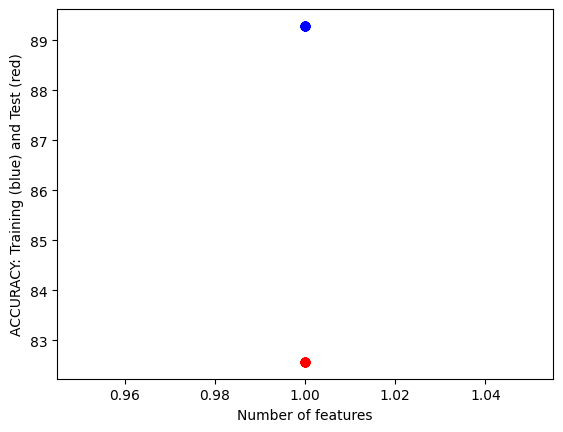

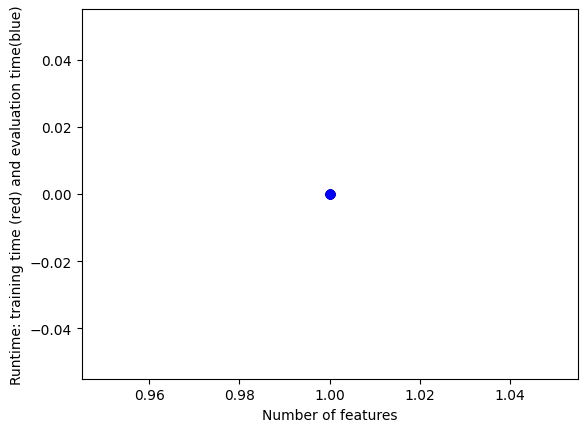

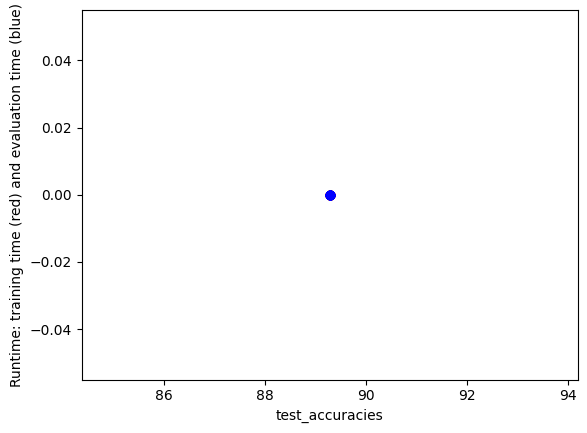

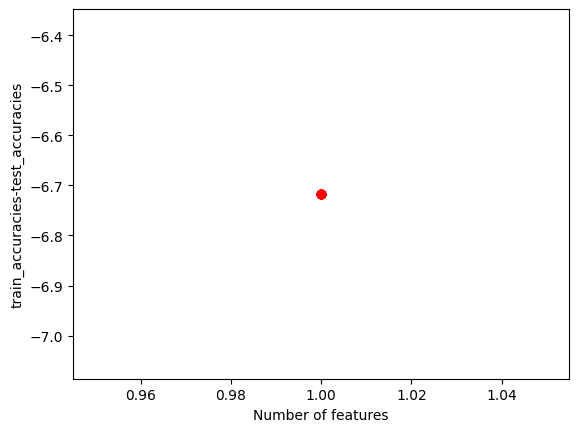

In [ ]:
# CHECK RESULTS 
save_results(output_dir+"/variance_threshold")
plot_results(output_dir+"/variance_threshold")

# Dim Reduction Tab

PCA 

In [ ]:
import requests
import json
import re
#import pycountry
import pandas as pd
import numpy as np

appledf = pd.read_csv("../websitedata/apple_py.csv")

newAppledf = pd.read_csv("../websitedata/newApple_py.csv")

In [ ]:
y = appledf["Peak"]
y=np.array(y)

x= newAppledf.drop(columns={"Peak", "Unnamed: 0"})
print(x.head)

<bound method NDFrame.head of      Chart Position  Position Duration  (x?)  Points  Country Rank
0                 1                 68    45   16920            29
1                 2                 27     9   14619            44
2                 3                  6     1   13364             1
3                 4                  6     2   12624             2
4                 5                  6     2   12359             3
..              ...                ...   ...     ...           ...
831               7                245    13   10731            28
832              30                 90    10    5425           166
833              33                356    50    5108           146
834              62                412    13    2739           116
835              70                307     3    2487           104

[836 rows x 5 columns]>


In [ ]:
# LOAD DATA
X= x
Y= y

#NORMALIZE AND RESHAPE
X=X/np.max(X) #NORMALIZE
# X=X.reshape(60000,28*28); #print(X[0])
cov_X = X.cov()
print(cov_X)

                   Chart Position  Position Duration          (x?)    Points  \
Chart Position       8.667260e-06           0.000040 -3.608966e-07 -0.000697   
Position Duration    3.996314e-05           0.000639  1.775432e-05 -0.004122   
(x?)                -3.608966e-07           0.000018  7.882437e-06 -0.000151   
Points              -6.968281e-04          -0.004122 -1.509267e-04  0.090143   
Country Rank         4.868267e-06           0.000026  1.687945e-07 -0.000486   

                   Country Rank  
Chart Position     4.868267e-06  
Position Duration  2.598144e-05  
(x?)               1.687945e-07  
Points            -4.861844e-04  
Country Rank       9.751437e-06  


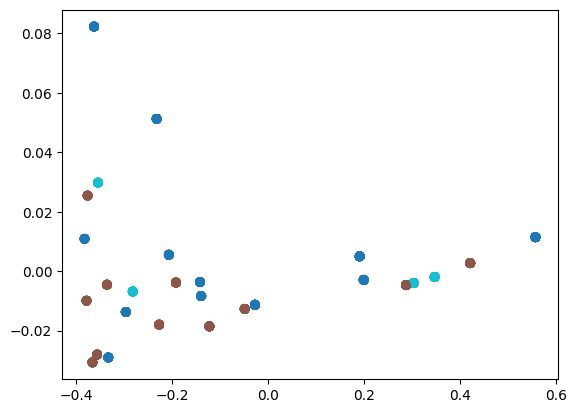

In [ ]:
# APPLYING PCA TO WHOLE DATASET

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#COMPUTE PCA
from sklearn.decomposition import PCA
n_components = X.shape[1]
pca = PCA(n_components=n_components)
# pca.fit(X)
X1=pca.fit_transform(X)

#2D PLOT; for Chart Position and Position Duration
plt.scatter(X1[:,0], X1[:,1], c=Y, cmap='tab10')
plt.show()

In [ ]:
#COMPUTE PRINCIPAL COMPONENTS use min instead of mle due to it being a small dataset
n_components = min(X.shape[0], X.shape[1])

print(n_components)

5


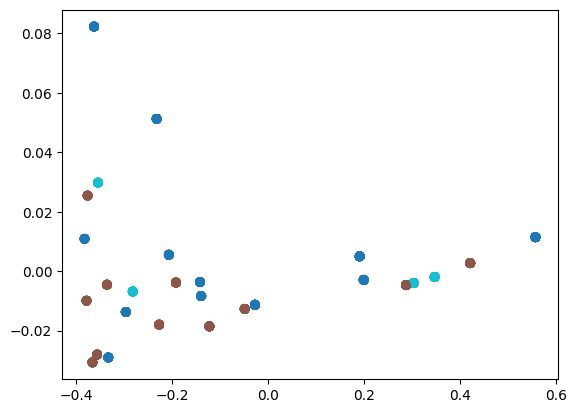

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#COMPUTE PCA
from sklearn.decomposition import PCA
n_components = min(X.shape[0], X.shape[1])
pca = PCA(n_components=n_components)
# pca.fit(X)
X1=pca.fit_transform(X)

#2D PLOT; for Chart Position and Country Rank
plt.scatter(X1[:,0], X1[:,1], c=Y, cmap='tab10')
plt.show()

t-SNE

RESULTS
shape :  (836, 3)
First few points : 
 [[ -8.388347  -18.935404    5.538542 ]
 [-22.517128    3.9654715  -3.976839 ]]


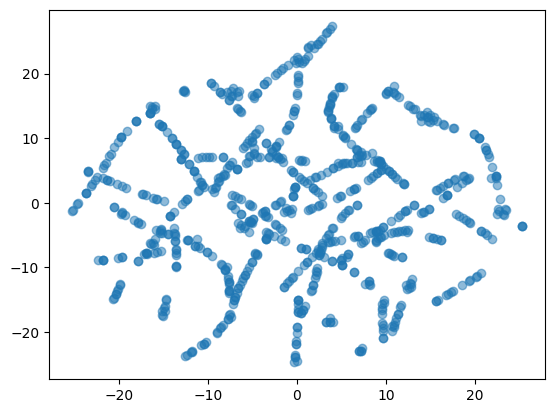

In [ ]:
import numpy as np
from sklearn.manifold import TSNE

# DO DIMENSIONALITY REDUCTION
X_embedded = TSNE(n_components=3, learning_rate='auto',init='random', perplexity=5).fit_transform(X)

# EXPLORE RESULTS
print("RESULTS") 
print("shape : ",X_embedded.shape)
print("First few points : \n",X_embedded[0:2,:])

# PLOT 
plt.scatter(X_embedded[:,0],X_embedded[:,1], alpha=0.5)
plt.show()

RESULTS
shape :  (836, 3)
First few points : 
 [[ -5.956273    6.9747543 -16.60038  ]
 [ -6.9851933 -17.012617   -7.2051907]]


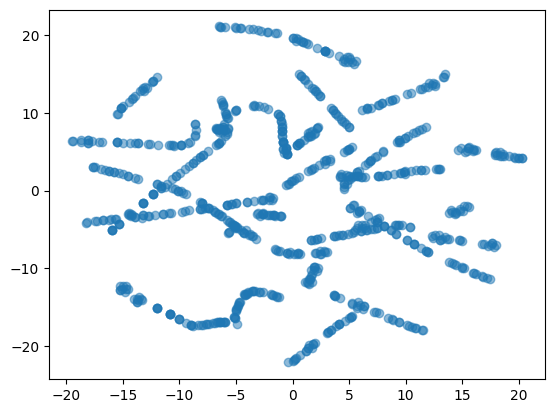

In [ ]:
# DIFFERENT PERPLEXITY
X_embedded = TSNE(n_components=3, learning_rate='auto',init='random', perplexity=10).fit_transform(X)

# EXPLORE RESULTS
print("RESULTS") 
print("shape : ",X_embedded.shape)
print("First few points : \n",X_embedded[0:2,:])

# PLOT 
plt.scatter(X_embedded[:,0],X_embedded[:,1], alpha=0.5)
plt.show()

RESULTS
shape :  (836, 3)
First few points : 
 [[-1.610676  -6.0438194  6.4087   ]
 [ 4.963665  12.0376625 14.282181 ]]


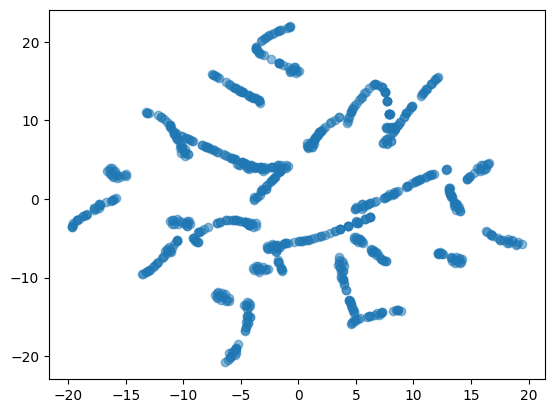

In [ ]:
# DIFFERENT PERPLEXITY
X_embedded = TSNE(n_components=3, learning_rate='auto',init='random', perplexity=15).fit_transform(X)

# EXPLORE RESULTS
print("RESULTS") 
print("shape : ",X_embedded.shape)
print("First few points : \n",X_embedded[0:2,:])

# PLOT 
plt.scatter(X_embedded[:,0],X_embedded[:,1], alpha=0.5)
plt.show()

# Clustering Tab

In [130]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [134]:
spotifydf = pd.read_csv("../websitedata/spotify_py.csv")

spotifydf = spotifydf.drop(columns={"Unnamed: 0.1", "Unnamed: 0", "Artist Name", "Track Name", "Album Name"}, axis=1)
spotifyDF = spotifydf.drop(columns={"Valence"}) # Label (measures positivity) needs to be dropped
spotifyDF.head

<bound method NDFrame.head of      Danceability  Energy  Loudness  Speechiness    Tempo  Album Release Year
0           0.864   0.556    -7.683       0.1940   99.974                2023
1           0.831   0.362    -6.085       0.2290  139.941                2023
2           0.804   0.656    -5.723       0.0896  150.014                2023
3           0.764   0.720    -6.494       0.2730   91.337                2023
4           0.854   0.808    -5.958       0.1390  110.203                2023
..            ...     ...       ...          ...      ...                 ...
388         0.638   0.259   -10.706       0.0898   88.485                2021
389         0.395   0.443    -9.720       0.1330  168.924                2021
390         0.695   0.575    -6.334       0.1160  163.929                2021
391         0.369   0.272   -10.497       0.0364  172.929                2021
392         0.443   0.298   -12.181       0.0644   77.253                2021

[393 rows x 6 columns]>

In [135]:
X = spotifyDF 
y = spotifydf["Valence"] 

print(X.shape, y.shape)
X = np.ascontiguousarray(X)

(393, 6) (393,)


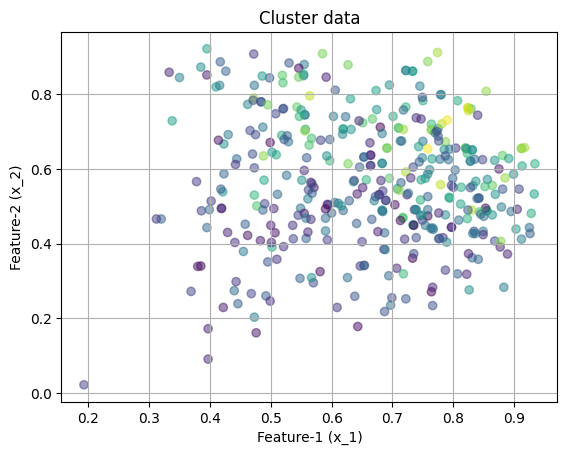

In [136]:
# UTILITY PLOTTING FUNCTION
def plot(X,color_vector):
    fig, ax = plt.subplots()
    ax.scatter(X[:,0], X[:,1],c=color_vector, alpha=0.5) #, c=y
    ax.set(xlabel='Feature-1 (x_1)', ylabel='Feature-2 (x_2)',
    title='Cluster data')
    ax.grid()
    # fig.savefig("test.png")
    plt.show()

plot(X,y)

In [141]:
# HYPERPARAMETER TUNING
import sklearn.cluster
import warnings
warnings.filterwarnings("ignore")


# THIS WILL ITERATE OVER ONE HYPER-PARAMETER (GRID SEARCH)
# AND RETURN THE CLUSTER RESULT THAT OPTIMIZES THE SILHOUETTE SCORE
def maximize_silhouette(X,algo="birch",nmax=20,i_plot=False):

    # PARAM
    i_print=False

    #FORCE CONTIGUOUS
    X=np.ascontiguousarray(X)

    # LOOP OVER HYPER-PARAM
    params=[]; sil_scores=[]
    sil_max=-10
    for param in range(2,nmax+1):
        if(algo=="birch"):
            model = sklearn.cluster.Birch(n_clusters=param).fit(X)
            labels=model.predict(X)

        if(algo=="ag"):
            model = sklearn.cluster.AgglomerativeClustering(n_clusters=param).fit(X)
            labels=model.labels_

        if(algo=="dbscan"):
            param=0.25*(param-1)
            model = sklearn.cluster.DBSCAN(eps=param).fit(X)
            labels=model.labels_

        if(algo=="kmeans"):
            model = sklearn.cluster.KMeans(n_clusters=param).fit(X)
            labels=model.predict(X)

        try:
            sil_scores.append(sklearn.metrics.silhouette_score(X,labels))
            params.append(param)
        except:
            continue

        if(i_print): print(param,sil_scores[-1])

        if(sil_scores[-1]>sil_max):
             opt_param=param
             sil_max=sil_scores[-1]
             opt_labels=labels

    print("OPTIMAL PARAMETER =",opt_param)

    if(i_plot):
        fig, ax = plt.subplots()
        ax.plot(params, sil_scores, "-o")
        ax.set(xlabel='Hyper-parameter', ylabel='Silhouette')
        plt.show()

    return opt_labels

OPTIMAL PARAMETER = 2


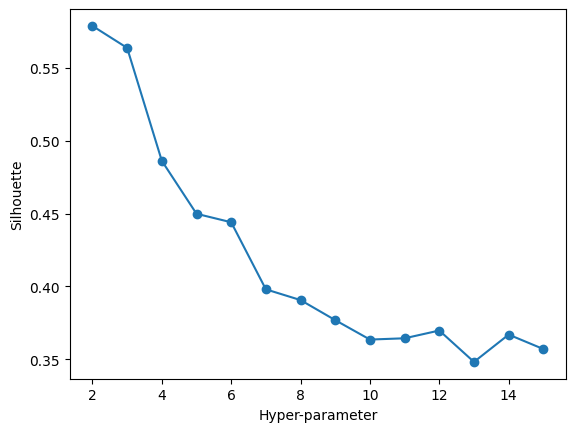

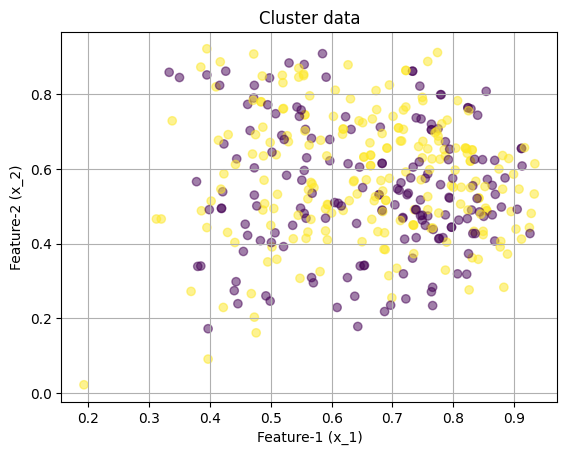

In [142]:
# KMEANS
opt_labels=maximize_silhouette(X,algo="kmeans",nmax=15, i_plot=True)
plot(X,opt_labels)

OPTIMAL PARAMETER = 2


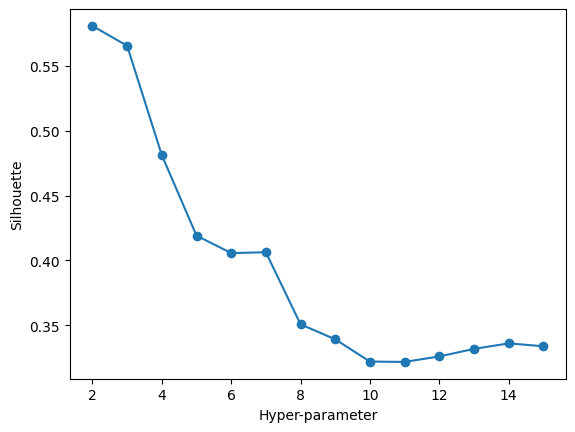

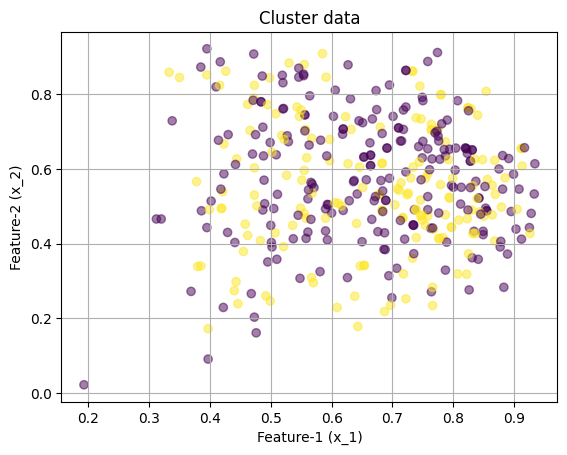

In [143]:
# AGGLOMERATIVE CLUSTERING
opt_labels=maximize_silhouette(X,algo="ag",nmax=15, i_plot=True)
plot(X,opt_labels)

OPTIMAL PARAMETER = 3.5


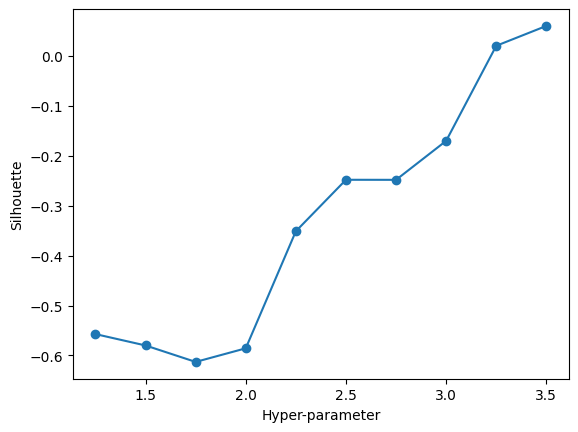

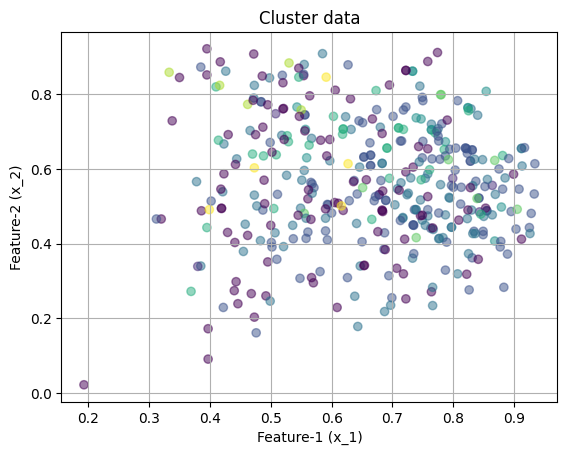

In [144]:
# DBSCAN
opt_labels=maximize_silhouette(X,algo="dbscan",nmax=15, i_plot=True)
plot(X,opt_labels)

### Final Analysis

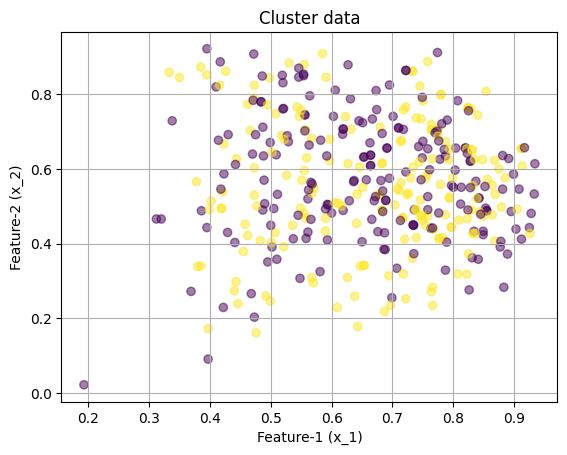

In [145]:
# KMEANS
model = sklearn.cluster.KMeans(n_clusters=2).fit(X)
labels=model.predict(X)
plot(X,labels)

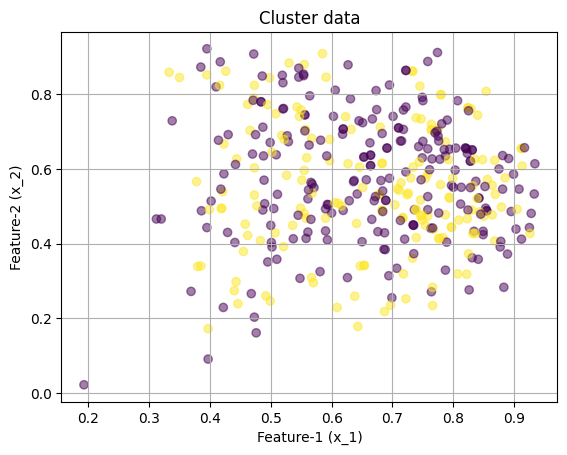

In [146]:
# AGGLOMERATIVE CLUSTERING
model = sklearn.cluster.AgglomerativeClustering(n_clusters=2).fit(X)
labels=model.labels_
plot(X,labels)

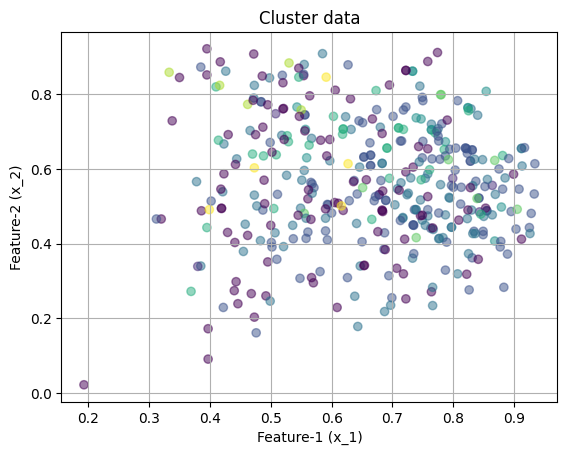

In [150]:
# DBSCAN 
model = sklearn.cluster.DBSCAN(eps=3.5).fit(X)
labels=model.labels_
plot(X,labels)

# Decision Trees